## Load Libraries

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

sns.set(color_codes=True)

## Loading the data

In [209]:
month1_df = pd.read_csv("./data/aug_month_new.csv")
month2_df = pd.read_csv("./data/sept_month_new.csv")
month3_df = pd.read_csv("./data/oct_month_new.csv")
month4_df = pd.read_csv("./data/nov_month_new.csv")
month5_df = pd.read_csv("./data/dec_month_new.csv")
month6_df = pd.read_csv("./data/jan_month_new.csv")
month7_df = pd.read_csv("./data/feb_month_new.csv")
month8_df = pd.read_csv("./data/mar_month_new.csv")

raw_df = pd.concat([month1_df,month2_df,month3_df,month4_df,month5_df,month6_df,month7_df,month8_df])

## Data Pre-prossessing

In [210]:
raw_df.dtypes

schedule_no                    int64
route_id                       int64
trip_number                    int64
scheduled_trip_start_time     object
scheduled_trip_end_time       object
device_id                    float64
route_bus_stop_id              int64
route_order                    int64
window_start_time             object
window_end_time               object
is_dread_trip                  int64
distance                       int64
time_to_travel                 int64
bus_stop_name                 object
bus_stop_latitude            float64
bus_stop_longitude           float64
dayofweek                     object
month                          int64
year                           int64
ist_timestamp_seconds        float64
acc_distance                 float64
arrival_time                  object
dtype: object

In [211]:
raw_df.count()

schedule_no                  75650
route_id                     75650
trip_number                  75650
scheduled_trip_start_time    75650
scheduled_trip_end_time      75650
device_id                    74609
route_bus_stop_id            75650
route_order                  75650
window_start_time            75650
window_end_time              75585
is_dread_trip                75650
distance                     75650
time_to_travel               75650
bus_stop_name                75650
bus_stop_latitude            75650
bus_stop_longitude           75650
dayofweek                    75650
month                        75650
year                         75650
ist_timestamp_seconds        48701
acc_distance                 48701
arrival_time                 48701
dtype: int64

In [212]:
raw_df.head()

,schedule_no,route_id,trip_number,scheduled_trip_start_time,scheduled_trip_end_time,device_id,route_bus_stop_id,route_order,window_start_time,window_end_time,is_dread_trip,distance,time_to_travel,bus_stop_name,bus_stop_latitude,bus_stop_longitude,dayofweek,month,year,ist_timestamp_seconds,acc_distance,arrival_time
0,3037,9197,1,07:45:00,07:47:00,150812438.00,1291,1,2016-08-08 06:48:54,2016-08-08 07:12:06,1,0,0,Depot-34 (Kottanur),12.87,77.59,Monday,8,2016,nan,nan,NaN
1,3037,9197,1,07:45:00,07:47:00,150812438.00,1291,1,2016-08-09 06:45:56,2016-08-09 07:01:36,1,0,0,Depot-34 (Kottanur),12.87,77.59,Tuesday,8,2016,nan,nan,NaN
2,3037,9197,1,07:45:00,07:47:00,150812438.00,1291,1,2016-08-18 06:40:36,2016-08-18 06:40:36,1,0,0,Depot-34 (Kottanur),12.87,77.59,Thursday,8,2016,nan,nan,NaN
3,3037,9197,1,07:45:00,07:47:00,150812438.00,1291,1,2016-08-27 07:06:49,2016-08-27 07:23:59,1,0,0,Depot-34 (Kottanur),12.87,77.59,Saturday,8,2016,nan,nan,NaN
4,3037,9197,1,07:45:00,07:47:00,150812438.00,1291,1,2016-08-04 06:56:57,2016-08-04 06:58:35,1,0,0,Depot-34 (Kottanur),12.87,77.59,Thursday,8,2016,nan,nan,NaN


In [213]:
filtered_df = raw_df
filtered_df.is_copy = False

In [214]:
# Select required features: For a particular schedule: 365R
filtered_df = filtered_df[["route_id","trip_number", "device_id", "route_bus_stop_id", "route_order",
                           "distance", "time_to_travel", "dayofweek", "month", "year",
                           "ist_timestamp_seconds", "arrival_time"]]

# Remove rows where ist_timestamp_seconds is NaN
#filtered_df = filtered_df.dropna(subset=['ist_timestamp_seconds'])

### Feature Engineering

In [215]:
derived_df = filtered_df
derived_df.is_copy = False
derived_df.head()

,route_id,trip_number,device_id,route_bus_stop_id,route_order,distance,time_to_travel,dayofweek,month,year,ist_timestamp_seconds,arrival_time
0,9197,1,150812438.00,1291,1,0,0,Monday,8,2016,nan,NaN
1,9197,1,150812438.00,1291,1,0,0,Tuesday,8,2016,nan,NaN
2,9197,1,150812438.00,1291,1,0,0,Thursday,8,2016,nan,NaN
3,9197,1,150812438.00,1291,1,0,0,Saturday,8,2016,nan,NaN
4,9197,1,150812438.00,1291,1,0,0,Thursday,8,2016,nan,NaN


### Derived features: Converting route_id, dayofweek,month,year into categorical vars

In [216]:
derived_df.dtypes

route_id                   int64
trip_number                int64
device_id                float64
route_bus_stop_id          int64
route_order                int64
distance                   int64
time_to_travel             int64
dayofweek                 object
month                      int64
year                       int64
ist_timestamp_seconds    float64
arrival_time              object
dtype: object

In [217]:
derived_df["route_id"] = derived_df["route_id"].astype("category")
derived_df["route_bus_stop_id"] = derived_df["route_bus_stop_id"].astype("category")
derived_df["dayofweek"] = derived_df["dayofweek"].astype("category")
derived_df["month"] = derived_df["month"].astype("category")
derived_df["year"] = derived_df["year"].astype("category")

# GK: Doubt for trip_number and route_order

In [218]:
derived_df.dtypes

route_id                 category
trip_number                 int64
device_id                 float64
route_bus_stop_id        category
route_order                 int64
distance                    int64
time_to_travel              int64
dayofweek                category
month                    category
year                     category
ist_timestamp_seconds     float64
arrival_time               object
dtype: object

### Derived feature: derive time slot from timestamp

In [219]:
derived_df["arrival_time"] = pd.to_datetime(derived_df["arrival_time"])
derived_df["time_slot"] = derived_df["arrival_time"].dt.hour

### Derived feature: dayofweek in numeric

In [220]:
derived_df['dayofweek_numeric'] = derived_df['arrival_time'].dt.dayofweek

### Derived Feature: dayofmonth

In [221]:
derived_df["dayofmonth"] = derived_df["arrival_time"].dt.day
derived_df["dayofmonth"] = derived_df["dayofmonth"].astype("category")

### Derived feature: deriving time to travel between bus stops

In [222]:
derived_df.columns

Index(['route_id', 'trip_number', 'device_id', 'route_bus_stop_id',
       'route_order', 'distance', 'time_to_travel', 'dayofweek', 'month',
       'year', 'ist_timestamp_seconds', 'arrival_time', 'time_slot',
       'dayofweek_numeric', 'dayofmonth'],
      dtype='object')

In [223]:
derived_df.head()

,route_id,trip_number,device_id,route_bus_stop_id,route_order,distance,time_to_travel,dayofweek,month,year,ist_timestamp_seconds,arrival_time,time_slot,dayofweek_numeric,dayofmonth
0,9197,1,150812438.00,1291,1,0,0,Monday,8,2016,nan,NaT,nan,nan,nan
1,9197,1,150812438.00,1291,1,0,0,Tuesday,8,2016,nan,NaT,nan,nan,nan
2,9197,1,150812438.00,1291,1,0,0,Thursday,8,2016,nan,NaT,nan,nan,nan
3,9197,1,150812438.00,1291,1,0,0,Saturday,8,2016,nan,NaT,nan,nan,nan
4,9197,1,150812438.00,1291,1,0,0,Thursday,8,2016,nan,NaT,nan,nan,nan


In [224]:
grouped_derived_df = derived_df.groupby(['device_id','route_id','trip_number','dayofmonth','month','year'])

In [225]:
arrival_time_derived_df = pd.DataFrame()
for name,group in grouped_derived_df:
    group['actual_time_to_travel'] = group['ist_timestamp_seconds'].diff()
    arrival_time_derived_df = arrival_time_derived_df.append(group)

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [226]:
arrival_time_derived_df.to_csv("arrival_time_derived.csv", index = False)

In [227]:
len(arrival_time_derived_df.index)

48701

In [228]:
arrival_time_derived_df.head()

,route_id,trip_number,device_id,route_bus_stop_id,route_order,distance,time_to_travel,dayofweek,month,year,ist_timestamp_seconds,arrival_time,time_slot,dayofweek_numeric,dayofmonth,actual_time_to_travel
1264,20239,4,150812438.00,160,1,0,0,Sunday,1,2017,1483248802.00,2017-01-01 11:03:22,11.00,6.00,1.00,nan
1283,20239,4,150812438.00,5841,2,80,6,Sunday,1,2017,1483248812.00,2017-01-01 11:03:32,11.00,6.00,1.00,10.00
1312,20239,4,150812438.00,33,3,210,15,Sunday,1,2017,1483248863.00,2017-01-01 11:04:23,11.00,6.00,1.00,51.00
1334,20239,4,150812438.00,5840,4,60,4,Sunday,1,2017,1483248883.00,2017-01-01 11:04:43,11.00,6.00,1.00,20.00
1379,20239,4,150812438.00,8455,5,70,5,Sunday,1,2017,1483248893.00,2017-01-01 11:04:53,11.00,6.00,1.00,10.00


#### Removing outliers based on actual time to travel between bus stops

In [229]:
new_derived_df = pd.read_csv('arrival_time_derived.csv')

In [230]:
# Sanity check based upon the number of records
len(new_derived_df.index)

48701

In [231]:
new_derived_df[(new_derived_df["dayofmonth"] == 12)  & (new_derived_df["trip_number"] == 4) ].head()

,route_id,trip_number,device_id,route_bus_stop_id,route_order,distance,time_to_travel,dayofweek,month,year,ist_timestamp_seconds,arrival_time,time_slot,dayofweek_numeric,dayofmonth,actual_time_to_travel
2327,20239,4,150812438.00,160,1,0,0,Sunday,2,2017,1486871562.00,2017-02-12 09:22:42,9.00,6.00,12.00,nan
2328,20239,4,150812438.00,5841,2,80,6,Sunday,2,2017,1486871592.00,2017-02-12 09:23:12,9.00,6.00,12.00,30.00
2329,20239,4,150812438.00,33,3,210,15,Sunday,2,2017,1486871781.00,2017-02-12 09:26:21,9.00,6.00,12.00,189.00
2330,20239,4,150812438.00,5840,4,60,4,Sunday,2,2017,1486871790.00,2017-02-12 09:26:30,9.00,6.00,12.00,9.00
2331,20239,4,150812438.00,8455,5,70,5,Sunday,2,2017,1486871800.00,2017-02-12 09:26:40,9.00,6.00,12.00,10.00


In [232]:
# Remove rows with negaive timestamp
new_derived_df = new_derived_df[new_derived_df["actual_time_to_travel"] > 1]

In [233]:
len(new_derived_df.index)

43281

In [234]:
#new_derived_df = new_derived_df.sort_values(['device_id','trip_number','route_order'])
#new_derived_df = new_derived_df.reset_index(drop=True)

In [235]:
new_derived_df.actual_time_to_travel.describe()

count   43281.00
mean      285.69
std      1007.57
min         9.00
25%        70.00
50%       119.00
75%       199.00
max     26530.00
Name: actual_time_to_travel, dtype: float64

In [236]:
pd.options.display.float_format = '{:.2f}'.format

In [237]:
new_derived_df.actual_time_to_travel.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.92,0.94,0.96,0.97,0.98,0.99])

count   43281.00
mean      285.69
std      1007.57
min         9.00
10%        30.00
20%        60.00
30%        80.00
40%        99.00
50%       119.00
60%       139.00
70%       170.00
80%       229.00
90%       329.00
92%       377.00
94%       439.00
96%       597.00
97%       897.00
98%      3068.00
99%      5401.60
max     26530.00
Name: actual_time_to_travel, dtype: float64

In [238]:
# Remove rows with travel time between bus stops is greater than 97 percentile (adding some bias)
new_derived_df = new_derived_df[new_derived_df['actual_time_to_travel'] <= 1500]

In [239]:
len(new_derived_df.index)

42185

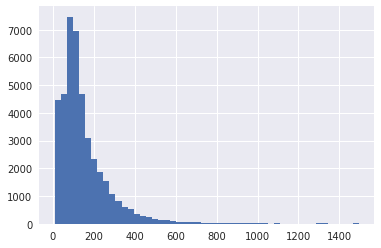

In [240]:
# Histogram of actual time to travel to the bus stop
new_derived_df.actual_time_to_travel.hist(bins=50)

### Derived Feature: Time taken till that bus stop

In [241]:
new_derived_df.head()

,route_id,trip_number,device_id,route_bus_stop_id,route_order,distance,time_to_travel,dayofweek,month,year,ist_timestamp_seconds,arrival_time,time_slot,dayofweek_numeric,dayofmonth,actual_time_to_travel
1,20239,4,150812438.00,5841,2,80,6,Sunday,1,2017,1483248812.00,2017-01-01 11:03:32,11.00,6.00,1.00,10.00
2,20239,4,150812438.00,33,3,210,15,Sunday,1,2017,1483248863.00,2017-01-01 11:04:23,11.00,6.00,1.00,51.00
3,20239,4,150812438.00,5840,4,60,4,Sunday,1,2017,1483248883.00,2017-01-01 11:04:43,11.00,6.00,1.00,20.00
4,20239,4,150812438.00,8455,5,70,5,Sunday,1,2017,1483248893.00,2017-01-01 11:04:53,11.00,6.00,1.00,10.00
5,20239,4,150812438.00,124,6,1634,207,Sunday,1,2017,1483249081.00,2017-01-01 11:08:01,11.00,6.00,1.00,188.00


In [242]:
new_derived_grouped = new_derived_df.groupby(['device_id','route_id','trip_number','dayofmonth','month','year'])

In [243]:
time_taken_sofar_derived_df = pd.DataFrame()
for name,group in new_derived_grouped:
    group['time_taken_sofar'] = group['actual_time_to_travel'].cumsum() - group['actual_time_to_travel']
    time_taken_sofar_derived_df = time_taken_sofar_derived_df.append(group)

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [244]:
time_taken_sofar_derived_df[(time_taken_sofar_derived_df["dayofmonth"] == 12)  &\
                            (time_taken_sofar_derived_df["trip_number"] == 4) &\
                            (time_taken_sofar_derived_df['month'] == 9) &\
                            (time_taken_sofar_derived_df['year'] == 2016)].head()

,route_id,trip_number,device_id,route_bus_stop_id,route_order,distance,time_to_travel,dayofweek,month,year,ist_timestamp_seconds,arrival_time,time_slot,dayofweek_numeric,dayofmonth,actual_time_to_travel,time_taken_sofar
2444,20239,4,150812438.00,5841,2,80,6,Monday,9,2016,1473650236.00,2016-09-12 08:47:16,8.00,0.00,12.00,10.00,0.00
2445,20239,4,150812438.00,33,3,210,15,Monday,9,2016,1473650295.00,2016-09-12 08:48:15,8.00,0.00,12.00,59.00,10.00
2446,20239,4,150812438.00,5840,4,60,4,Monday,9,2016,1473650315.00,2016-09-12 08:48:35,8.00,0.00,12.00,20.00,69.00
2447,20239,4,150812438.00,8455,5,70,5,Monday,9,2016,1473650325.00,2016-09-12 08:48:45,8.00,0.00,12.00,10.00,89.00
2448,20239,4,150812438.00,61,7,357,85,Monday,9,2016,1473650963.00,2016-09-12 08:59:23,8.00,0.00,12.00,638.00,99.00


### Encoding using scikit learn

In [245]:
encoded_df = time_taken_sofar_derived_df
encoded_df.is_copy = False
encoded_df.head()

,route_id,trip_number,device_id,route_bus_stop_id,route_order,distance,time_to_travel,dayofweek,month,year,ist_timestamp_seconds,arrival_time,time_slot,dayofweek_numeric,dayofmonth,actual_time_to_travel,time_taken_sofar
1,20239,4,150812438.00,5841,2,80,6,Sunday,1,2017,1483248812.00,2017-01-01 11:03:32,11.00,6.00,1.00,10.00,0.00
2,20239,4,150812438.00,33,3,210,15,Sunday,1,2017,1483248863.00,2017-01-01 11:04:23,11.00,6.00,1.00,51.00,10.00
3,20239,4,150812438.00,5840,4,60,4,Sunday,1,2017,1483248883.00,2017-01-01 11:04:43,11.00,6.00,1.00,20.00,61.00
4,20239,4,150812438.00,8455,5,70,5,Sunday,1,2017,1483248893.00,2017-01-01 11:04:53,11.00,6.00,1.00,10.00,81.00
5,20239,4,150812438.00,124,6,1634,207,Sunday,1,2017,1483249081.00,2017-01-01 11:08:01,11.00,6.00,1.00,188.00,91.00


In [246]:
encoded_df.dtypes

route_id                   int64
trip_number                int64
device_id                float64
route_bus_stop_id          int64
route_order                int64
distance                   int64
time_to_travel             int64
dayofweek                 object
month                      int64
year                       int64
ist_timestamp_seconds    float64
arrival_time              object
time_slot                float64
dayofweek_numeric        float64
dayofmonth               float64
actual_time_to_travel    float64
time_taken_sofar         float64
dtype: object

In [247]:
# Remove unncessary or duplicate information
encoded_df = encoded_df.drop('device_id', axis = 1)
encoded_df = encoded_df.drop('dayofweek', axis = 1)
encoded_df = encoded_df.drop('ist_timestamp_seconds', axis = 1)
encoded_df = encoded_df.drop('arrival_time', axis = 1)

In [248]:
# Convert categoical variables into category data type
encoded_df["route_id"] = encoded_df["route_id"].astype("category")
encoded_df["trip_number"] = encoded_df["trip_number"].astype("category")
encoded_df["route_bus_stop_id"] = encoded_df["route_bus_stop_id"].astype("category")
encoded_df["route_order"] = encoded_df["route_order"].astype("category")
encoded_df["month"] = encoded_df["month"].astype("category")
encoded_df["year"] = encoded_df["year"].astype("category")
encoded_df["time_slot"] = encoded_df["time_slot"].astype("category")
encoded_df["dayofweek_numeric"] = encoded_df["dayofweek_numeric"].astype("category")
encoded_df["dayofmonth"] = encoded_df["dayofmonth"].astype("category")

In [249]:
subset_encoded_df = encoded_df.select_dtypes(include=['category'])

In [250]:
subset_encoded_df.head()

,route_id,trip_number,route_bus_stop_id,route_order,month,year,time_slot,dayofweek_numeric,dayofmonth
1,20239,4,5841,2,1,2017,11.00,6.00,1.00
2,20239,4,33,3,1,2017,11.00,6.00,1.00
3,20239,4,5840,4,1,2017,11.00,6.00,1.00
4,20239,4,8455,5,1,2017,11.00,6.00,1.00
5,20239,4,124,6,1,2017,11.00,6.00,1.00


In [251]:
# Import preprocessing from sklearn
from sklearn import preprocessing

# Create a LabelEncoder object and fit it to each feature in X

# 1. Create a empty encoded dataframe to store the transformation
subset_encoded_df_2 = pd.DataFrame()

# 2. Create a dictionary to map values and label
global_index = 0
mappings = {}

# 3. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()

# 4/5. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
#subset_encoded_df_2 = subset_encoded_df.apply(le.fit_transform)
for column in subset_encoded_df.columns:
    subset_encoded_df_2[column] = le_record.fit_transform(subset_encoded_df[column].ravel())
    for index,label in zip(range(len(le_record.classes_)), le_record.classes_):
        mappings[global_index] = column + str(label)
        global_index = global_index + 1

subset_encoded_df_2.head()

,route_id,trip_number,route_bus_stop_id,route_order,month,year,time_slot,dayofweek_numeric,dayofmonth
0,0,2,54,0,0,1,4,6,0
1,0,2,0,1,0,1,4,6,0
2,0,2,53,2,0,1,4,6,0
3,0,2,64,3,0,1,4,6,0
4,0,2,42,4,0,1,4,6,0


In [252]:
np.unique(subset_encoded_df[["route_order"]].values)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41])

In [253]:
np.unique(subset_encoded_df_2[["route_order"]].values)
#"route_id","trip_number","route_bus_stop_id","route_order","is_dread_trip","month","year","time_slot","dayofweek_numeric","dayofmonth"

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [254]:
4+11+76+40+8+2+15+7+31

194

In [255]:
# create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(subset_encoded_df_2)

# 3. Transform
onehotlabels = enc.transform(subset_encoded_df_2).toarray()
onehotlabels.shape

(42185, 194)

In [256]:
onehotlabels # For each training example, the categorical variables are encoded via a 195 Dimensional vector

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

### Sanity check for the encoding of the categorical features

- onehotlabels is the encoding of the labeled features
- subset_encoded_df_2 contains the labeled features
- subset_encoded_df contains the original categories
- mappings is the dictionary containing the index of the encoded category

In [258]:
print(onehotlabels[0])
subset_encoded_df_2.iloc[0:1,:]

[ 1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


,route_id,trip_number,route_bus_stop_id,route_order,month,year,time_slot,dayofweek_numeric,dayofmonth
0,0,2,54,0,0,1,4,6,0


In [259]:
subset_encoded_df.iloc[0:1,:]

,route_id,trip_number,route_bus_stop_id,route_order,month,year,time_slot,dayofweek_numeric,dayofmonth
1,20239,4,5841,2,1,2017,11.00,6.00,1.00


In [260]:
onehotlabels[0][162]

1.0

In [262]:
mappings[162]

'dayofweek_numeric6.0'

### Comibine encoded one hot labels with the time_taken_sofar feature and the response var: actual_time_to_travel

In [263]:
onehotlabels_df = pd.DataFrame(onehotlabels)

In [264]:
onehotlabels_df.shape

(42185, 194)

In [265]:
onehotlabels_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193
0,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [266]:
onehotlabels_df['actual_time_to_travel'] = encoded_df['actual_time_to_travel']
onehotlabels_df['time_taken_sofar'] = encoded_df['time_taken_sofar']

In [267]:
onehotlabels_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,actual_time_to_travel,time_taken_sofar
0,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan
1,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00
2,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,51.00,10.00
3,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,61.00
4,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,81.00


### Saving the Final data frame

In [268]:
onehotlabels_df.to_csv("PreProcessed.csv", index = False)

### Save the mappings of the labels

In [279]:
import pickle
import os

pickle_file = open('mappings.pickle', 'wb')
pickle.dump(obj = mappings, file = pickle_file)
pickle_file.close()
os.getcwd()

'/home/gaurav/BMTC_ETA/Transport_ETA/365R'